In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey.csv")

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,YearsCode,YearsCodePro,Country,Currency,CompTotal,CompFreq,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,United States of America,USD\tUnited States dollar,NaN,NaN,Easy,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           73268 non-null  int64  
 1   MainBranch           73268 non-null  object 
 2   Employment           71709 non-null  object 
 3   RemoteWork           58958 non-null  object 
 4   CodingActivities     58899 non-null  object 
 5   EdLevel              71571 non-null  object 
 6   YearsCode            71331 non-null  object 
 7   YearsCodePro         51833 non-null  object 
 8   Country              71771 non-null  object 
 9   Currency             51264 non-null  object 
 10  CompTotal            38422 non-null  float64
 11  CompFreq             44425 non-null  object 
 12  SurveyEase           70508 non-null  object 
 13  ConvertedCompYearly  38071 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 7.8+ MB


In [5]:
df["ConvertedCompYearly"]

0             NaN
1             NaN
2         40205.0
3        215232.0
4             NaN
           ...   
73263         NaN
73264         NaN
73265         NaN
73266         NaN
73267         NaN
Name: ConvertedCompYearly, Length: 73268, dtype: float64

In [6]:
df =df[["Country", "EdLevel", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,NaN


In [7]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,194400.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Salary        38071 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [9]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [10]:
df["Country"].value_counts()

United States of America                                8684
Germany                                                 2901
United Kingdom of Great Britain and Northern Ireland    2649
India                                                   2155
Canada                                                  1478
                                                        ... 
Fiji                                                       1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 159, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37923 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37923 non-null  object 
 1   EdLevel       37923 non-null  object 
 2   YearsCodePro  37923 non-null  object 
 3   Salary        37923 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Other                                                   10330
United States of America                                 8684
Germany                                                  2901
United Kingdom of Great Britain and Northern Ireland     2649
India                                                    2155
Canada                                                   1478
France                                                   1372
Brazil                                                   1279
Spain                                                     993
Poland                                                    973
Netherlands                                               897
Australia                                                 830
Italy                                                     807
Sweden                                                    664
Russian Federation                                        533
Switzerland                                               520
Turkey  

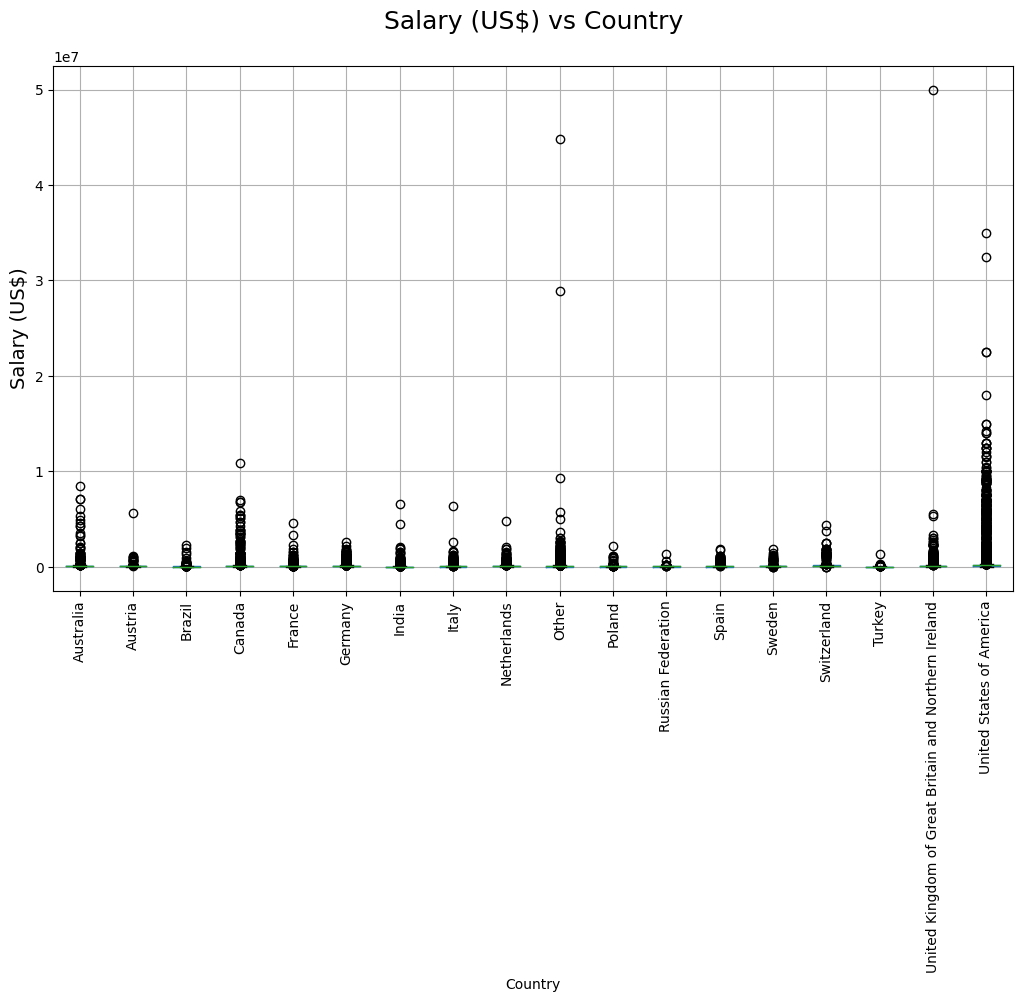

In [14]:
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) vs Country", fontsize=18)
plt.title("")
plt.ylabel("Salary (US$)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

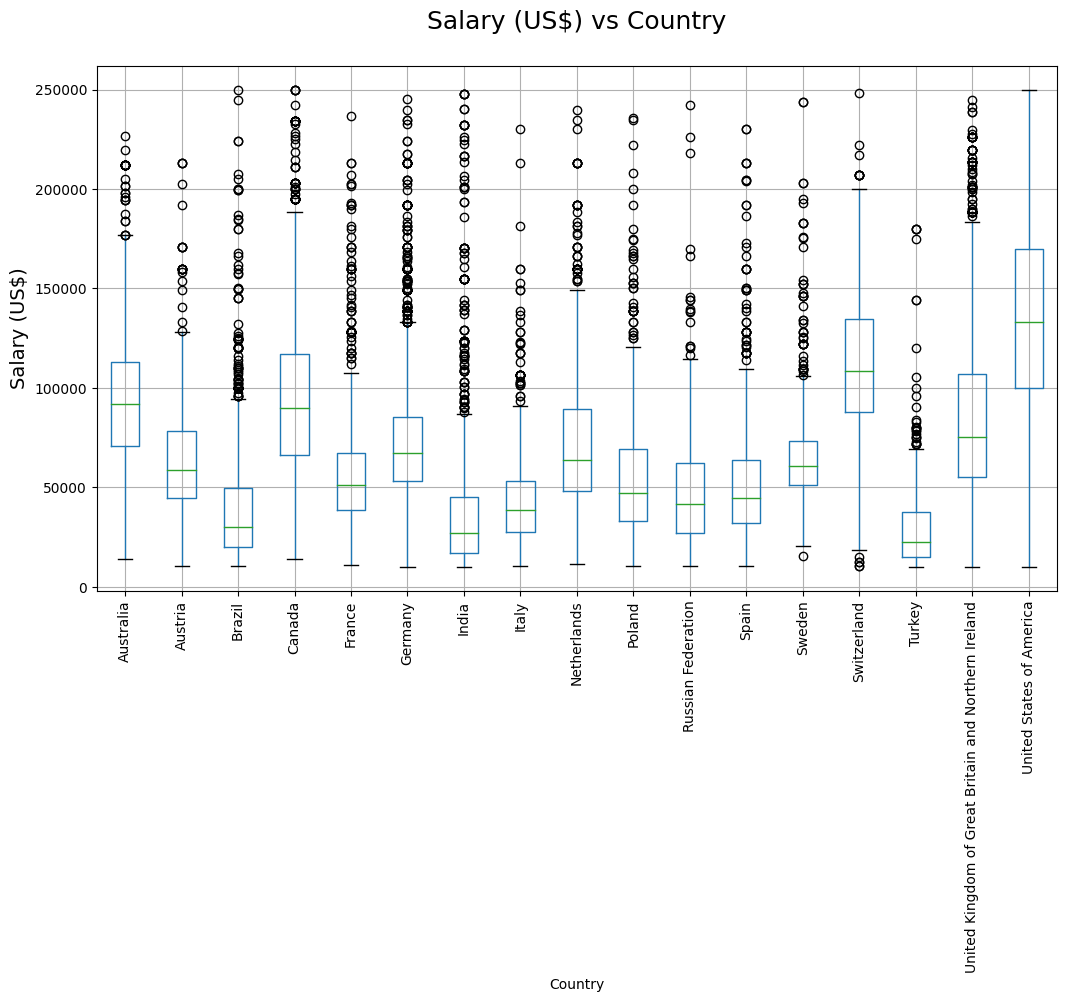

In [16]:
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) vs Country", fontsize=18)
plt.title("")
plt.ylabel("Salary (US$)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [17]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '10', '22', '4', '20', '9', '14', '21', '15', '25',
       '3', '8', '12', '7', '19', '1', '17', '24', '11', '23',
       'Less than 1 year', '18', '40', '37', '46', '13', '32', '31', '39',
       '27', '28', '16', '30', '34', '35', '26', '42', '38', '36', '41',
       '44', '29', '33', 'More than 50 years', '45', '48', '43', '50',
       '47', '49'], dtype=object)

In [18]:
def clean_experience(x):
    if x == "More than 50 years":
        return 51
    elif x == "Less than 1 year":
        return 0.5
    else:
        return float(x)
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [19]:
df["YearsCodePro"].unique()

array([ 5. ,  6. ,  2. , 10. , 22. ,  4. , 20. ,  9. , 14. , 21. , 15. ,
       25. ,  3. ,  8. , 12. ,  7. , 19. ,  1. , 17. , 24. , 11. , 23. ,
        0.5, 18. , 40. , 37. , 46. , 13. , 32. , 31. , 39. , 27. , 28. ,
       16. , 30. , 34. , 35. , 26. , 42. , 38. , 36. , 41. , 44. , 29. ,
       33. , 51. , 45. , 48. , 43. , 50. , 47. , 49. ])

In [20]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [21]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    elif "Master’s degree" in x:
        return "Master’s degree"
    elif "Professional degree" in x or "Other doctoral degree" in x:
        return "Post grad"
    else:
        return "Less than a Bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [22]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)